## Importing necessary libraries,Data Collection,Filter

In [1]:
import pandas as pd
import datetime as dt

# Define the start and end dates
start = dt.datetime(2021, 2, 1)
end = dt.datetime(2022, 2, 4)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('NFLX.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index, extra step csv file 
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,536.789978,545.059998,531.729980,539.039978,539.039978,3547500
2021-02-02,542.010010,555.479980,538.929993,548.159973,548.159973,3767600
2021-02-03,550.169983,550.479980,538.239990,539.450012,539.450012,3172300
2021-02-04,539.809998,559.479980,537.510010,552.159973,552.159973,5164500
2021-02-05,552.260010,554.440002,545.479980,550.789978,550.789978,2376200
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [2]:

stk_data=stk_data[["Open","High","Low","Close"]]

In [3]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-02-01,536.789978,545.059998,531.729980,539.039978
2021-02-02,542.010010,555.479980,538.929993,548.159973
2021-02-03,550.169983,550.479980,538.239990,539.450012
2021-02-04,539.809998,559.479980,537.510010,552.159973
2021-02-05,552.260010,554.440002,545.479980,550.789978
...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015
2022-02-01,432.959991,458.480011,425.540009,457.130005
2022-02-02,448.250000,451.980011,426.480011,429.480011


In [4]:
stk_data.index

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=257, freq=None)

## Data Preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (257, 4)


In [6]:
data1

array([[0.50471216, 0.51016241, 0.53871431, 0.54019691],
       [0.52133223, 0.54289569, 0.56023065, 0.5676676 ],
       [0.54731279, 0.52718871, 0.55816866, 0.54143199],
       ...,
       [0.22280952, 0.21776147, 0.22418794, 0.21018706],
       [0.1374491 , 0.14638899, 0.15784599, 0.13825716],
       [0.09246055, 0.09458733, 0.13501485, 0.15202266]])

# Data Preprocessing

In [7]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])
data1

,Open,High,Low,Close
0,0.504712,0.510162,0.538714,0.540197
1,0.521332,0.542896,0.560231,0.567668
2,0.547313,0.527189,0.558169,0.541432
3,0.514328,0.555461,0.555987,0.579716
4,0.553967,0.539629,0.579804,0.575590
...,...,...,...,...
252,0.075459,0.141488,0.139677,0.203139
253,0.174128,0.238181,0.221379,0.293473
254,0.222810,0.217761,0.224188,0.210187
255,0.137449,0.146389,0.157846,0.138257


In [8]:
data1.shape

(257, 4)

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# creating dictionary to store values
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}
# creating list
listt=["Close","High","Open","Low"]

In [11]:
performance

{'Model': [], 'RMSE': [], 'MaPe': [], 'Lag': [], 'Test': []}

In [12]:
listt

['Close', 'High', 'Open', 'Low']

In [13]:
datasetTwo=data1[listt]
datasetTwo

,Close,High,Open,Low
0,0.540197,0.510162,0.504712,0.538714
1,0.567668,0.542896,0.521332,0.560231
2,0.541432,0.527189,0.547313,0.558169
3,0.579716,0.555461,0.514328,0.555987
4,0.575590,0.539629,0.553967,0.579804
...,...,...,...,...
252,0.203139,0.141488,0.075459,0.139677
253,0.293473,0.238181,0.174128,0.221379
254,0.210187,0.217761,0.222810,0.224188
255,0.138257,0.146389,0.137449,0.157846


# Train and Test Split & Model Creation

In [22]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def combination(dataset, listt):
    print(listt)
    datasetTwo = dataset[listt]
    test_obs = 28
    train = datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]

    # Initialize lists to store performance metrics
    rmse_list = []
    mape_list = []
    lag_list = []

    for p in range(1, 6):  # Iterate over different autoregressive orders
        for q in range(1, 4):  # Iterate over different moving average orders
            try:
                model = VARMAX(train, order=(p, q))  # VARMA model
                result = model.fit(maxiter=1000, disp=False)

                print('Order = (p={}, q={})'.format(p, q))
                print('AIC: ', result.aic)
                print('BIC: ', result.bic)
                print()

                # Forecast
                pred = result.forecast(steps=28)

                # Calculate performance metrics
                rmse = round(mean_squared_error(test, pred, squared=False))
                mape = mean_absolute_percentage_error(test, pred)

                # Append metrics to lists
                rmse_list.append(rmse)
                mape_list.append(mape)
                lag_list.append((p, q))
                
            except Exception as e:
                print(f"Error fitting model for order (p={p}, q={q}): {e}")
                
    # Check if rmse_list is empty
    if not rmse_list:
        print("No suitable models found.")
        return None, None, None

    
    # Find the best performing model based on RMSE
    min_rmse_index = rmse_list.index(min(rmse_list))
    best_lag = lag_list[min_rmse_index]
    best_rmse = rmse_list[min_rmse_index]
    best_mape = mape_list[min_rmse_index]

    print('Best Model (based on RMSE):')
    print('Order (p, q):', best_lag)
    print('RMSE:', best_rmse)
    print('MAPE:', best_mape)

    # Fit the best model
    best_model = VARMAX(train, order=best_lag)
    best_result = best_model.fit(maxiter=1000, disp=False)

    # Forecast using the best model
    best_pred = best_result.forecast(steps=28)

    # Save forecast to CSV
    preds = pd.DataFrame(best_pred, columns=listt)
    #preds.to_csv("varma_forecasted_{}.csv".format(test_obs))

    # Create DataFrame to store performance metrics
    performance = pd.DataFrame({
        'Model': [listt],
        'RMSE': [best_rmse],
        'MAPE': [best_mape],
        'Lag': [best_lag],
        'Test': [test_obs]
    })

    return performance, best_result, best_pred,test

In [15]:
perf,best_res,best_pre, test=combination(data1, listt)

['Close', 'High', 'Open', 'Low']


D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=1)
AIC:  -5137.337406578367
BIC:  -4979.386194414872



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=1, q=2)
AIC:  -5121.024553942314
BIC:  -4908.133789721951



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=3)
AIC:  -5109.567257971672
BIC:  -4841.736941694441



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=1)
AIC:  -5117.216261578836
BIC:  -4904.325497358473



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=2, q=2)
AIC:  -5090.00908985446
BIC:  -4822.17877357723



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=2, q=3)
AIC:  -5080.04324696631
BIC:  -4757.2733786322115



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=1)
AIC:  -5115.294595421629
BIC:  -4847.4642791443985



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=2)
AIC:  -5083.558700901383
BIC:  -4760.788832567285



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=3, q=3)
AIC:  -5054.977389489948
BIC:  -4677.267969098982



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=4, q=1)
AIC:  -5093.348967621076
BIC:  -4770.579099286977



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=4, q=2)
AIC:  -5062.283902487827
BIC:  -4684.57448209686



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=4, q=3)
AIC:  -5030.254968351319
BIC:  -4597.605995903485



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=1)
AIC:  720842880.221978
BIC:  720843257.9313984



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=2)
AIC:  724115215.6330069
BIC:  724115648.2819793



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=3)
AIC:  743805839.1588163
BIC:  743806326.7473408

Best Model (based on RMSE):
Order (p, q): (1, 1)
RMSE: 0
MAPE: 114452805332722.64


D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [23]:
perf,best_res,best_pre, test=combination(data1, listt)

['Close', 'High', 'Open', 'Low']


D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=1)
AIC:  -5137.337406578367
BIC:  -4979.386194414872



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=1, q=2)
AIC:  -5121.024553942314
BIC:  -4908.133789721951



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=3)
AIC:  -5109.567257971672
BIC:  -4841.736941694441



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=1)
AIC:  -5117.216261578836
BIC:  -4904.325497358473



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=2, q=2)
AIC:  -5090.00908985446
BIC:  -4822.17877357723



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=2, q=3)
AIC:  -5080.04324696631
BIC:  -4757.2733786322115



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=1)
AIC:  -5115.294595421629
BIC:  -4847.4642791443985



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=2)
AIC:  -5083.558700901383
BIC:  -4760.788832567285



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=3, q=3)
AIC:  -5054.977389489948
BIC:  -4677.267969098982



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=4, q=1)
AIC:  -5093.348967621076
BIC:  -4770.579099286977



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=4, q=2)
AIC:  -5062.283902487827
BIC:  -4684.57448209686



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=4, q=3)
AIC:  -5030.254968351319
BIC:  -4597.605995903485



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=1)
AIC:  720842880.221978
BIC:  720843257.9313984



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=2)
AIC:  724115215.6330069
BIC:  724115648.2819793



D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=5, q=3)
AIC:  743805839.1588163
BIC:  743806326.7473408

Best Model (based on RMSE):
Order (p, q): (1, 1)
RMSE: 0
MAPE: 114452805332722.64


D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [16]:
perf

,Model,RMSE,MAPE,Lag,Test
0,"[Close, High, Open, Low]",0,1.144528e+14,"(1, 1)",28


In [17]:
best_res

In [18]:
best_pre

,Close,High,Open,Low
229,0.758819,0.742003,0.751132,0.759638
230,0.755773,0.741384,0.745053,0.753810
231,0.753466,0.739215,0.741470,0.750586
232,0.751313,0.736949,0.738878,0.748258
233,0.749216,0.734703,0.736553,0.746154
234,0.747153,0.732489,0.734312,0.744121
235,0.745119,0.730304,0.732112,0.742123
236,0.743113,0.728149,0.729944,0.740153
237,0.741133,0.726022,0.727805,0.738210
238,0.739179,0.723924,0.725694,0.736292


In [20]:
data1

,Open,High,Low,Close
0,0.504712,0.510162,0.538714,0.540197
1,0.521332,0.542896,0.560231,0.567668
2,0.547313,0.527189,0.558169,0.541432
3,0.514328,0.555461,0.555987,0.579716
4,0.553967,0.539629,0.579804,0.575590
...,...,...,...,...
252,0.075459,0.141488,0.139677,0.203139
253,0.174128,0.238181,0.221379,0.293473
254,0.222810,0.217761,0.224188,0.210187
255,0.137449,0.146389,0.157846,0.138257


In [25]:
data1

,Open,High,Low,Close
0,0.504712,0.510162,0.538714,0.540197
1,0.521332,0.542896,0.560231,0.567668
2,0.547313,0.527189,0.558169,0.541432
3,0.514328,0.555461,0.555987,0.579716
4,0.553967,0.539629,0.579804,0.575590
...,...,...,...,...
252,0.075459,0.141488,0.139677,0.203139
253,0.174128,0.238181,0.221379,0.293473
254,0.222810,0.217761,0.224188,0.210187
255,0.137449,0.146389,0.157846,0.138257


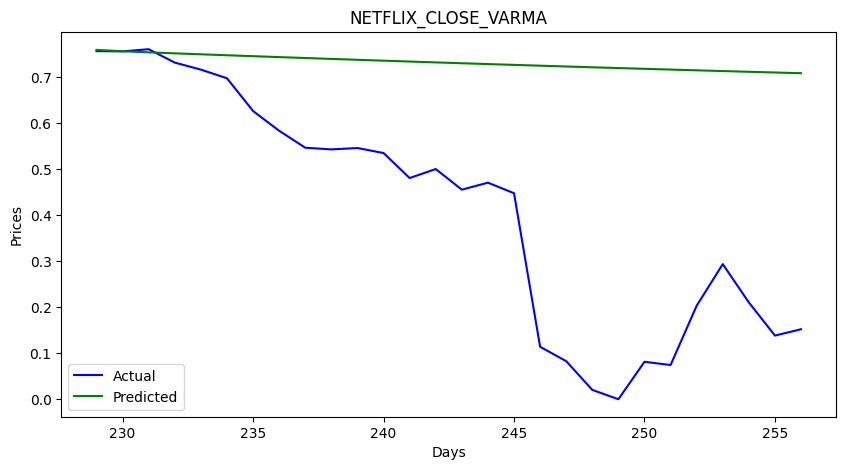

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test['Close'], color = 'blue', label="Actual")
plt.plot(best_pre['Close'], color = 'green', label ="Predicted")
plt.title("NETFLIX_CLOSE_VARMA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()